In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  
data_set = pd.read_csv("parkinsons.data")
data_set2 = pd.read_csv("parkinsons.data")

In [25]:
data_set

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,phon_R01_S50_2,174.188,230.978,94.261,0.00459,0.00003,0.00263,0.00259,0.00790,0.04087,...,0.07008,0.02764,19.517,0,0.448439,0.657899,-6.538586,0.121952,2.657476,0.133050
191,phon_R01_S50_3,209.516,253.017,89.488,0.00564,0.00003,0.00331,0.00292,0.00994,0.02751,...,0.04812,0.01810,19.147,0,0.431674,0.683244,-6.195325,0.129303,2.784312,0.168895
192,phon_R01_S50_4,174.688,240.005,74.287,0.01360,0.00008,0.00624,0.00564,0.01873,0.02308,...,0.03804,0.10715,17.883,0,0.407567,0.655683,-6.787197,0.158453,2.679772,0.131728
193,phon_R01_S50_5,198.764,396.961,74.904,0.00740,0.00004,0.00370,0.00390,0.01109,0.02296,...,0.03794,0.07223,19.020,0,0.451221,0.643956,-6.744577,0.207454,2.138608,0.123306


In [26]:
from sklearn.model_selection import train_test_split
data_set.drop(["name","status"],axis=1,inplace=True) 
x= data_set.iloc[:,:].values
x2=pd.DataFrame(x)

In [27]:
#cc = np.corrcoef(x)
cc=x2.corr()

In [28]:
#cc=pd.DataFrame(cc)



cc2=cc.style.background_gradient(cmap='coolwarm')
cc2

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21
0,1.000000,0.400985,0.596546,-0.118003,-0.382027,-0.076194,-0.112165,-0.076213,-0.098374,-0.073742,-0.094717,-0.070682,-0.077774,-0.094732,-0.021981,0.059144,-0.383894,-0.446013,-0.413738,-0.249450,0.177980,-0.372356
1,0.400985,1.000000,0.084951,0.102086,-0.029198,0.097177,0.091126,0.097150,0.002281,0.043465,-0.003743,-0.009997,0.004937,-0.003733,0.163766,-0.024893,-0.112404,-0.343097,-0.076658,-0.002954,0.176323,-0.069543
2,0.596546,0.084951,1.000000,-0.139919,-0.277815,-0.100519,-0.095828,-0.100488,-0.144543,-0.119089,-0.150747,-0.101095,-0.107293,-0.150737,-0.108670,0.210851,-0.400143,-0.050406,-0.394857,-0.243829,-0.100629,-0.340071
3,-0.118003,0.102086,-0.139919,1.000000,0.935714,0.990276,0.974256,0.990276,0.769063,0.804289,0.746625,0.725561,0.758255,0.746635,0.906959,-0.728165,0.360673,0.098572,0.693577,0.385123,0.433434,0.721543
4,-0.382027,-0.029198,-0.277815,0.935714,1.000000,0.922911,0.897778,0.922913,0.703322,0.716601,0.697153,0.648961,0.648793,0.697170,0.834972,-0.656810,0.441839,0.175036,0.735779,0.388543,0.310694,0.748162
5,-0.076194,0.097177,-0.100519,0.990276,0.922911,1.000000,0.957317,1.000000,0.759581,0.790652,0.744912,0.709927,0.737455,0.744919,0.919521,-0.721543,0.342140,0.064083,0.648328,0.324407,0.426605,0.670999
6,-0.112165,0.091126,-0.095828,0.974256,0.897778,0.957317,1.000000,0.957319,0.797826,0.839239,0.763580,0.786780,0.804139,0.763592,0.844604,-0.731510,0.333274,0.196301,0.716489,0.407605,0.412524,0.769647
7,-0.076213,0.097150,-0.100488,0.990276,0.922913,1.000000,0.957319,1.000000,0.759555,0.790621,0.744894,0.709907,0.737439,0.744901,0.919548,-0.721494,0.342079,0.064026,0.648328,0.324377,0.426556,0.671005
8,-0.098374,0.002281,-0.144543,0.769063,0.703322,0.759581,0.797826,0.759555,1.000000,0.987258,0.987625,0.982835,0.950083,0.987626,0.722194,-0.835271,0.447424,0.159954,0.654734,0.452025,0.507088,0.693771
9,-0.073742,0.043465,-0.119089,0.804289,0.716601,0.790652,0.839239,0.790621,0.987258,1.000000,0.963198,0.973751,0.960977,0.963202,0.744477,-0.827805,0.410684,0.165157,0.652547,0.454314,0.512233,0.695058


In [29]:
upper_triangle = cc.where(np.triu(np.ones(cc.shape),k=1).astype(np.bool_))
to_drop = [column for column in upper_triangle.columns if any(upper_triangle[column] > 0.90)]
df1 = data_set2.drop(data_set2.columns[to_drop], axis=1)

In [30]:
df1

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),Jitter:DDP,NHR,HNR,status,RPDE,DFA,spread1,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.01109,0.02211,21.033,1,0.414783,0.815285,-4.813031,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.01394,0.01929,19.085,1,0.458359,0.819521,-4.075192,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01633,0.01309,20.651,1,0.429895,0.825288,-4.443179,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.01505,0.01353,20.644,1,0.434969,0.819235,-4.117501,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01966,0.01767,19.649,1,0.417356,0.823484,-3.747787,2.332180,0.410335
...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,phon_R01_S50_2,174.188,230.978,94.261,0.00790,0.02764,19.517,0,0.448439,0.657899,-6.538586,2.657476,0.133050
191,phon_R01_S50_3,209.516,253.017,89.488,0.00994,0.01810,19.147,0,0.431674,0.683244,-6.195325,2.784312,0.168895
192,phon_R01_S50_4,174.688,240.005,74.287,0.01873,0.10715,17.883,0,0.407567,0.655683,-6.787197,2.679772,0.131728
193,phon_R01_S50_5,198.764,396.961,74.904,0.01109,0.07223,19.020,0,0.451221,0.643956,-6.744577,2.138608,0.123306


In [31]:
y= df1.iloc[:,7].values 
df1.drop(["name","status"],axis=1,inplace=True) 
x= df1.iloc[:,:].values
x2=pd.DataFrame(x)
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.4, random_state=0)  

In [32]:
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=int64)

In [33]:
#from sklearn.preprocessing import StandardScaler
#x_train = StandardScaler().fit_transform(x_train)
#x_test = StandardScaler().fit_transform(x_test)

In [34]:
#from sklearn.decomposition import PCA
#PCa = PCA (n_components = 1)     
#x_train = PCa.fit_transform(x_train)  
#x_test = PCa.transform(x_test)     
#explained_variance = PCa.explained_variance_ratio_  

In [35]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

In [36]:
forest = RandomForestClassifier(n_estimators = 100) 
forest.fit(x_train,y_train)

RandomForestClassifier()

In [37]:
y_pred = forest.predict(x_test)


In [38]:
print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(y_test, y_pred))
#print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(y_train, y_pred))

ACCURACY OF THE MODEL:  0.9358974358974359


In [39]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)


array([[13,  4],
       [ 1, 60]], dtype=int64)

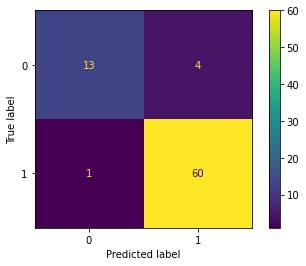

In [40]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(forest, x_test, y_test)  
plt.show()

In [41]:
import lightgbm as lgb
from lightgbm import LGBMClassifier

In [42]:
model = LGBMClassifier(boosting_type='dart',n_estimators=3200,num_leaves=1000,max_depth=100,learning_rate=0.2)
model.fit(x_train, y_train)
print(model.score(x_test, y_test))
y_predicted = model.predict(x_test)
print(confusion_matrix(y_test, y_predicted))

0.9743589743589743
[[15  2]
 [ 0 61]]


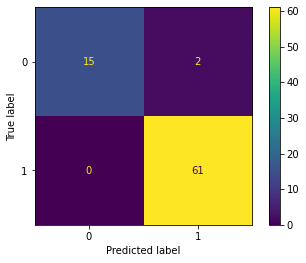

In [43]:
plot_confusion_matrix(model, x_test, y_test)  
plt.show()